In [1]:
import pandas as pd
from pylab import plot, show, legend, boxplot
import seaborn as sns
from pylab import title, xlabel, ylabel, axis, savefig, tight_layout, hist, boxplot
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import statsmodels.api as sm
from stargazer.stargazer import Stargazer

In [2]:
df = pd.read_csv('income2 (1).csv', sep = ';')

In [3]:
df_age = pd.read_csv('20_50.csv', sep = ';')

In [4]:
df_age0 = pd.read_csv('age_e0.csv', sep = ';')

In [5]:
df_age0

,age,wage_per_hour
0,42,1215
1,26,650
2,25,847
3,39,1005
4,43,600
...,...,...
977,47,700
978,32,900
979,40,400
980,43,800


In [6]:
df1 = df.drop(columns = ['industry_code', 'occupation_code', 'enrolled_in_edu_inst_lastwk'])

In [7]:
df1

,age,class_of_worker,education,wage_per_hour,marital_status,major_industry_code,major_occupation_code,race,hispanic_origin,sex,...,country_father,country_mother,country_self,citizenship,business_or_self_employed,fill_questionnaire_veteran_admin,veterans_benefits,weeks_worked_in_year,year,income_level
0,42,Private,0,1215,0,Mining,Precision production craft & repair,0,All other,0,...,United-States,United-States,United-States,Native- Born in the United States,0,0t in universe,2,52,95,0
1,26,Private,2,525,0,Entertainment,Other service,0,All other,1,...,United-States,United-States,United-States,Native- Born in the United States,0,0t in universe,2,52,95,0
2,18,Private,0,475,0,Retail trade,Sales,0,All other,0,...,United-States,United-States,United-States,Native- Born in the United States,2,0t in universe,2,50,95,0
3,24,Private,1,550,1,Retail trade,Other service,0,All other,0,...,Mexico,United-States,United-States,Native- Born in the United States,2,0t in universe,2,52,94,0
4,46,Private,1,465,1,Hospital services,Other service,0,All other,1,...,United-States,United-States,United-States,Native- Born in the United States,0,0t in universe,2,52,94,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11174,21,Private,1,460,1,Retail trade,Handlers equip cleaners etc,0,All other,1,...,United-States,United-States,United-States,Native- Born in the United States,0,0t in universe,2,0,95,0
11175,37,Local government,2,1135,1,Utilities and sanitary services,Adm support including clerical,0,All other,1,...,United-States,United-States,United-States,Native- Born in the United States,0,0t in universe,2,52,94,0
11176,43,Private,2,2200,1,Manufacturing-durable goods,Professional specialty,0,All other,0,...,United-States,United-States,United-States,Native- Born in the United States,0,0t in universe,2,52,95,1
11177,33,Private,1,700,0,Retail trade,Handlers equip cleaners etc,0,All other,0,...,United-States,United-States,United-States,Native- Born in the United States,0,0t in universe,2,52,95,0


In [8]:
#sns.lmplot(x='education', y='wage_per_hour', data=df,  line_kws = {'color' : 'black'})
#show()

In [9]:
df1['lwage'] = np.log(df1['wage_per_hour'])

In [10]:
y = df1['lwage']
X = df1['education']

X = sm.add_constant(X)

In [11]:
model5 = sm.OLS(y,X).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  lwage   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     873.3
Date:                Wed, 22 Dec 2021   Prob (F-statistic):          7.14e-185
Time:                        13:44:17   Log-Likelihood:                -8031.2
No. Observations:               11179   AIC:                         1.607e+04
Df Residuals:                   11177   BIC:                         1.608e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.5074      0.009    698.985      0.000       6.489       6.526
education      0.1868      0.006     29.552      0.000       0.174       0.199
==============================================================================
Omnibus:                      401.034   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              739.577
Skew:                           0.285   Prob(JB):                    2.53e-161
Kurtosis:                       4.124   Cond. No.                         4.02
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

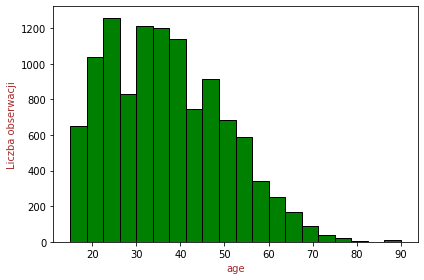

In [12]:
hist(df1.age, bins = 20, color = 'green', edgecolor = 'black')
xlabel('age', color = 'brown')
ylabel('Liczba obserwacji', color = 'brown')
tight_layout()
show()

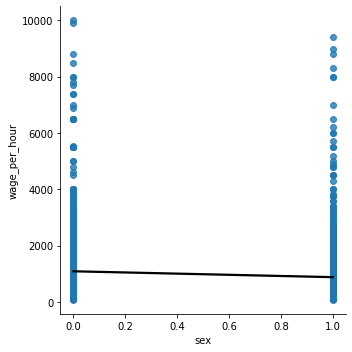

In [13]:
sns.lmplot(x='sex', y='wage_per_hour', data=df1,  line_kws = {'color' : 'black'})
show()

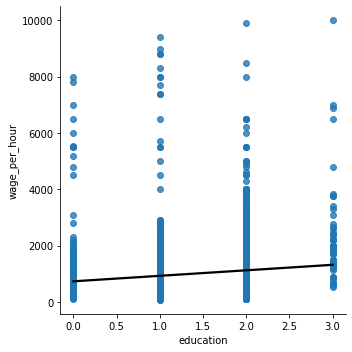

In [14]:
sns.lmplot(x='education', y='wage_per_hour', data=df1,  line_kws = {'color' : 'black'})
show()

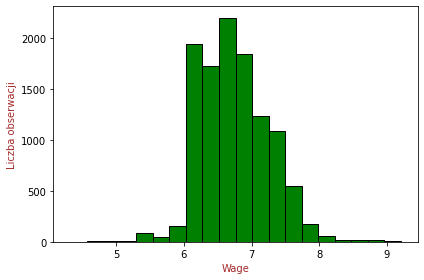

In [15]:
hist(df1.lwage, bins = 20, color = 'green', edgecolor = 'black')
xlabel('Wage', color = 'brown')
ylabel('Liczba obserwacji', color = 'brown')
tight_layout()
show()

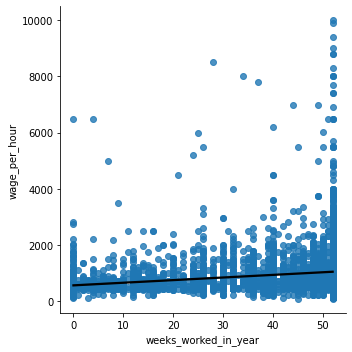

In [16]:
sns.lmplot(x='weeks_worked_in_year', y='wage_per_hour', data=df1,  line_kws = {'color' : 'black'})
show()

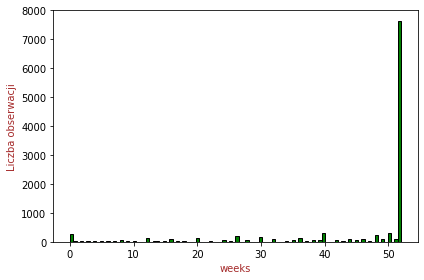

In [17]:
hist(df1.weeks_worked_in_year, bins = 100, color = 'green', edgecolor = 'black')
xlabel('weeks', color = 'brown')
ylabel('Liczba obserwacji', color = 'brown')
tight_layout()
show()

In [18]:
df_age['lwage'] = np.log(df_age['wage_per_hour'])

In [19]:
y = df_age['lwage']
X = df_age['education']

X = sm.add_constant(X)

In [20]:
model = sm.OLS(y, X).fit()

In [ ]:
model.summary()

In [22]:
df_age0['lwage'] = np.log(df_age0['wage_per_hour'])

In [23]:
y = df_age['lwage']
X = df_age['age']

In [24]:
model_age0 = sm.OLS(y, X).fit()
model_age0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  lwage   R-squared (uncentered):                   0.943
Model:                            OLS   Adj. R-squared (uncentered):              0.943
Method:                 Least Squares   F-statistic:                          1.390e+05
Date:                Wed, 22 Dec 2021   Prob (F-statistic):                        0.00
Time:                        13:44:19   Log-Likelihood:                         -16181.
No. Observations:                8479   AIC:                                  3.236e+04
Df Residuals:                    8478   BIC:                                  3.237e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.1863      0.000    372.839      0.000       0.185       0.187
==============================================================================
Omnibus:                      285.535   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              314.501
Skew:                          -0.470   Prob(JB):                     5.09e-69
Kurtosis:                       3.074   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Race: white-0
black-1
Asian or pacific islander-3
Amer Indian Aleut or Eskimo -4

In [25]:
y = df1['lwage']
X = df1[['sex','member_of_labor_union']]

X = sm.add_constant(X)

In [26]:
model_sex0 = sm.OLS(y, X).fit()
model_sex0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  lwage   R-squared:                       0.118
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     745.4
Date:                Wed, 22 Dec 2021   Prob (F-statistic):          1.29e-304
Time:                        13:44:20   Log-Likelihood:                -7751.8
No. Observations:               11179   AIC:                         1.551e+04
Df Residuals:                   11176   BIC:                         1.553e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     6.7566      0.007    936.784      0.000       6.742       6.771
sex                      -0.1527      0.009    -16.423      0.000      -0.171      -0.134
member_of_labor_union     0.3885      0.012     31.627      0.000       0.364       0.413
==============================================================================
Omnibus:                      713.144   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1416.426
Skew:                           0.450   Prob(JB):                    2.67e-308
Kurtosis:                       4.494   Cond. No.                         3.38
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
Stargazer([model,model_sex0,model5])